# Installing required libraries

In [1]:
!pip install catboost

# Imports section

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Reading data

In [3]:
data_train = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data_id_list = data_train['ID']
test_data_id_list = test_data['ID']

del data_train['ID']
del test_data['ID']

train_data = data_train.copy()


# Data Understanding

In [4]:
train_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [6]:
print(train_data.shape)
print(test_data.shape)

(245725, 10)
(105312, 9)


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [8]:
train_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [9]:
train_data.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [10]:
train_data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
print(train_data.isna().sum()/len(train_data)*100)
print(test_data.isna().sum()/len(test_data)*100)

Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64


# Handling Null Values

In [12]:
train_data['Credit_Product'] = train_data['Credit_Product'].fillna('Z')
test_data['Credit_Product'] = test_data['Credit_Product'].fillna('Z')

# Descriptive Analytics

### Gender

Male      134197
Female    111528
Name: Gender, dtype: int64


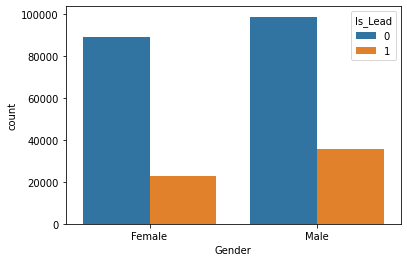

In [13]:
sns.countplot(data=train_data, x='Gender', hue='Is_Lead')
print(train_data['Gender'].value_counts())

### Age

28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64


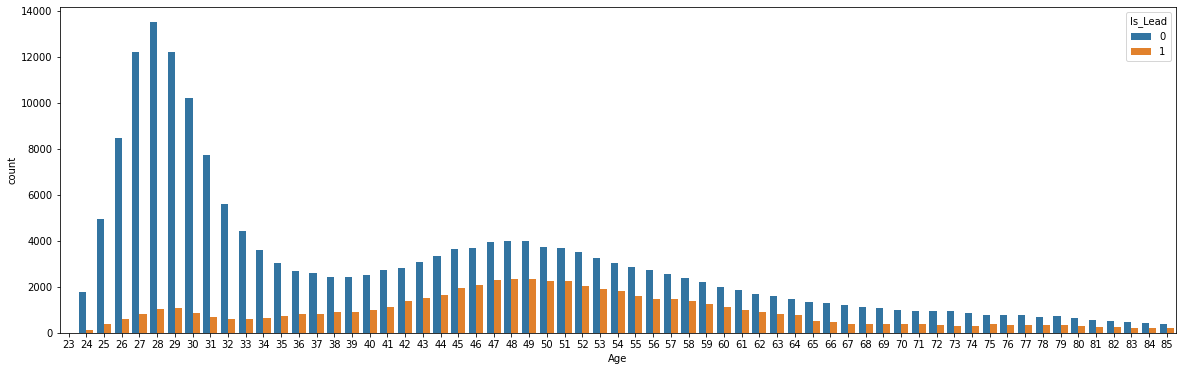

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(data=train_data, x='Age', hue='Is_Lead')
print(train_data['Age'].value_counts())

### Region_Code

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64


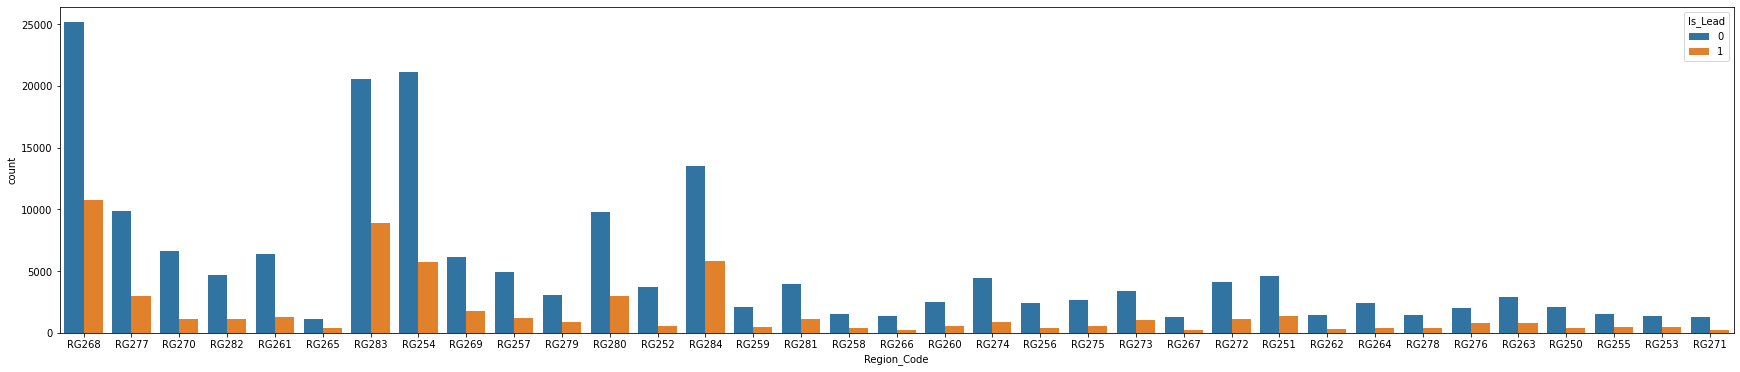

In [15]:
plt.figure(figsize=(30,6))
sns.countplot(data=train_data, x='Region_Code', hue='Is_Lead')
print(train_data['Region_Code'].value_counts())

### Occupation

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64


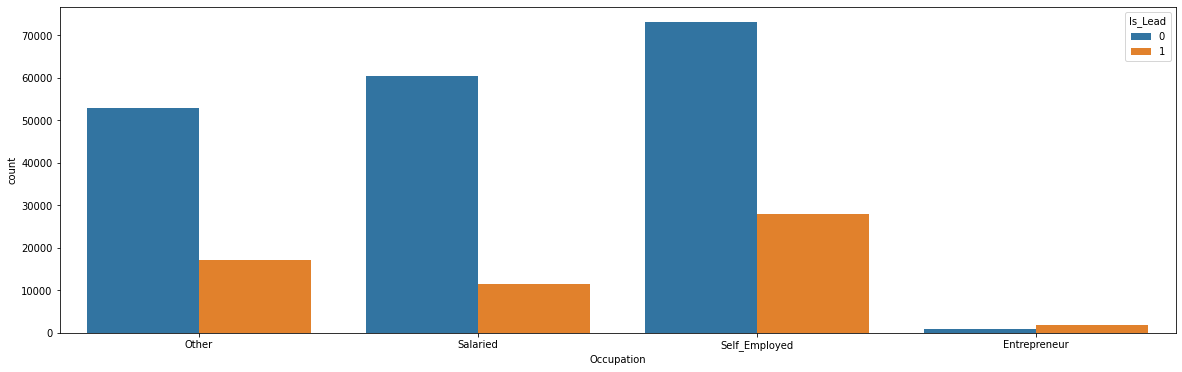

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(data=train_data, x='Occupation', hue='Is_Lead')
print(train_data['Occupation'].value_counts())

### Channel_Code

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64


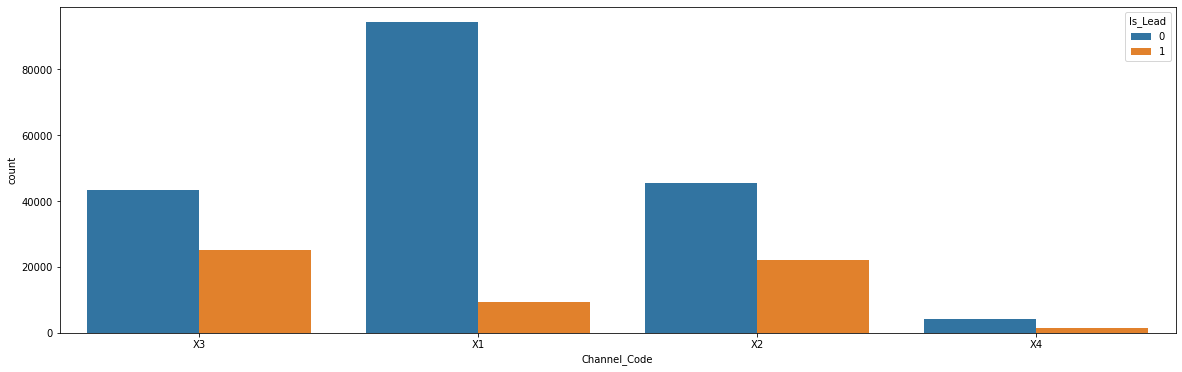

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(data=train_data, x='Channel_Code', hue='Is_Lead')
print(train_data['Channel_Code'].value_counts())

### Vintage

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64


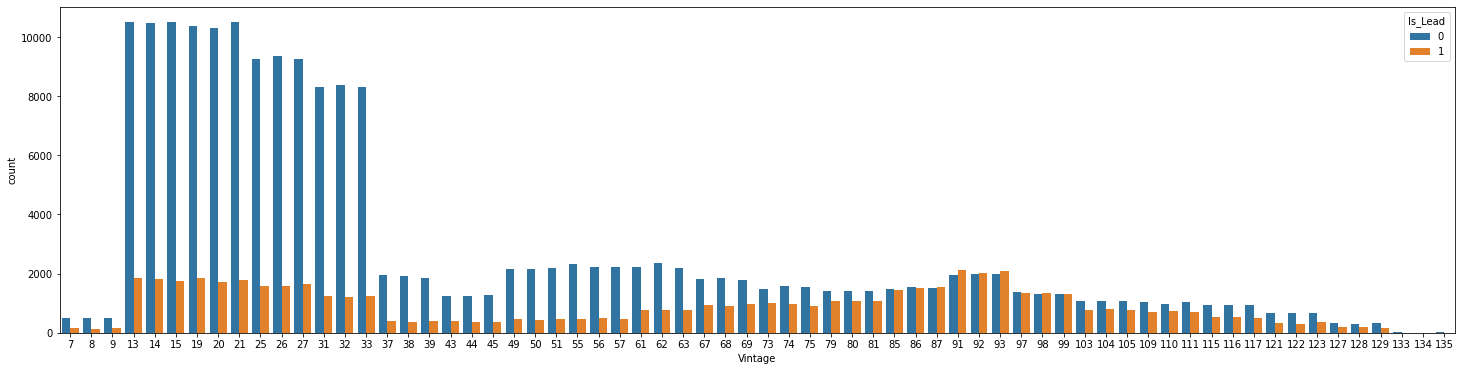

In [18]:
plt.figure(figsize=(25,6))
print(train_data['Vintage'].value_counts())
sns.countplot(data=train_data, x='Vintage', hue='Is_Lead')

### Credit_Product

No     144357
Yes     72043
Z       29325
Name: Credit_Product, dtype: int64


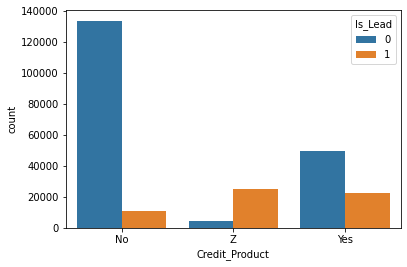

In [19]:
sns.countplot(data=train_data, x='Credit_Product', hue='Is_Lead')
print(train_data['Credit_Product'].value_counts())

### Is_Active

No     150290
Yes     95435
Name: Is_Active, dtype: int64


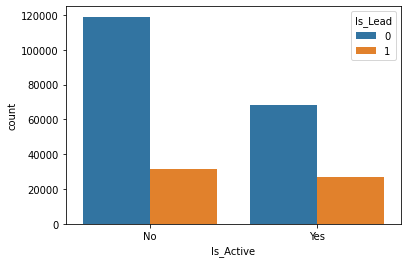

In [20]:
sns.countplot(data=train_data, x='Is_Active', hue='Is_Lead')
print(train_data['Is_Active'].value_counts())

### Avg_Account_Balance

mean for salary is  1128403.1010194323
median for salary is  894601.0


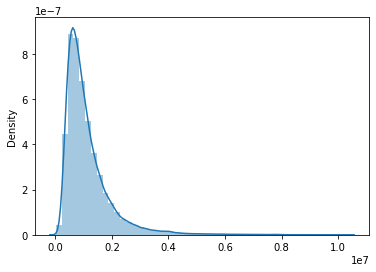

In [21]:
print('mean for salary is ',train_data.Avg_Account_Balance.mean())
print('median for salary is ',train_data.Avg_Account_Balance.median())
sns.distplot(x=train_data.Avg_Account_Balance)

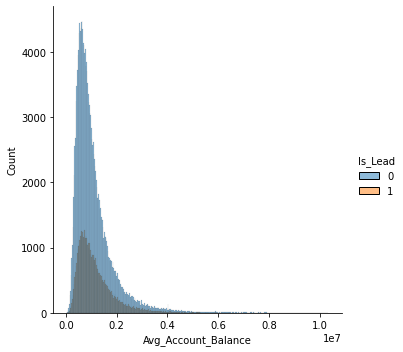

In [22]:
sns.displot(x='Avg_Account_Balance',data=train_data,hue='Is_Lead')

# Pre-Processing Data

### Label Encoding

In [23]:
def label_encoding_single(colList):    
    for col in colList:      
        label_encoder = preprocessing.LabelEncoder()  
        train_data[col]= label_encoder.fit_transform(train_data[col])
        test_data[col]= label_encoder.fit_transform(test_data[col])
    pass

label_encoding_single(['Credit_Product', 'Region_Code', 'Gender', 'Occupation', 'Channel_Code', 'Is_Active'])


### Log Transformation

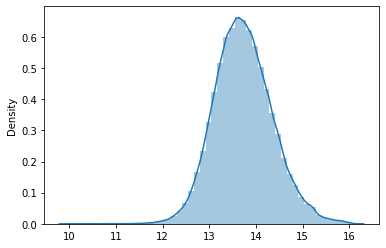

In [24]:
train_data['Avg_Account_Balance'] = train_data['Avg_Account_Balance'].apply(lambda x: np.log(x+1))
test_data['Avg_Account_Balance'] = test_data['Avg_Account_Balance'].apply(lambda x: np.log(x+1))
sns.distplot(x=train_data.Avg_Account_Balance)

In [25]:
train_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,13.860194,0,0
1,0,30,27,2,0,32,0,13.274207,0,0
2,0,56,18,3,2,26,0,14.210465,1,0
3,1,34,20,2,0,19,0,13.061456,0,0
4,0,30,32,2,0,33,0,13.695361,0,0


In [26]:
test_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,1,13.517599,0
1,1,43,18,1,1,49,2,13.738130,0
2,1,31,20,2,0,14,0,12.282802,0
3,1,29,22,1,0,33,0,13.674029,0
4,0,29,20,1,0,19,0,13.395573,0


# Correlation Matrix

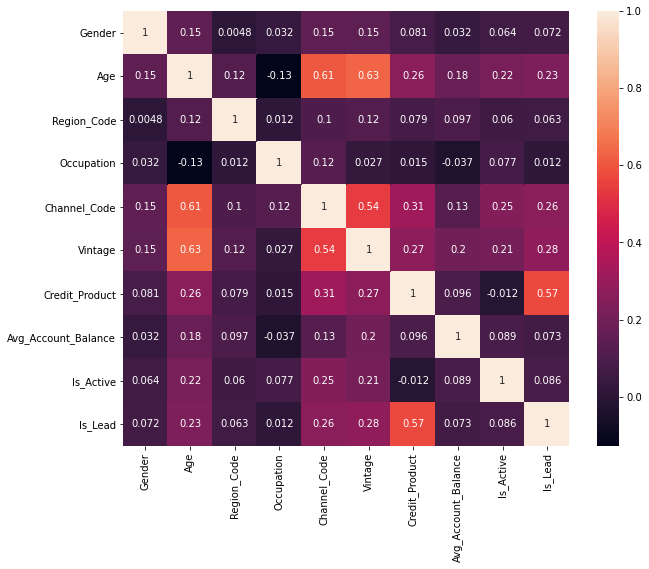

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(),annot=True)

In [28]:
target = 'Is_Lead'
df1=train_data.copy()
X = df1.loc[:, df1.columns!=target]
Y = df1.loc[:, df1.columns==target]

# local code for testing

### Train Test Split

0    187437
1     58288
Name: Is_Lead, dtype: int64


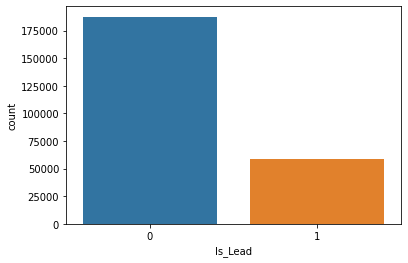

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.20, 
                                                    random_state=42)
ax = sns.countplot(x=df1[target], data=df1)
print(df1[target].value_counts())

### Oversampling

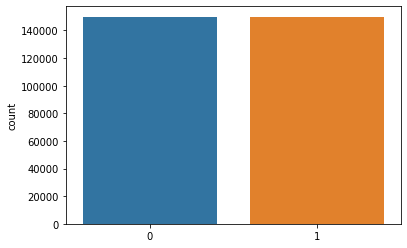

In [30]:
over = RandomOverSampler()
x, y = over.fit_resample(X_train, Y_train[target])
df_sampled = pd.DataFrame(x, columns = X_train.columns)
sns.countplot(y)

### Model Building

In [31]:
def generate_auc_roc_curve(clf, X_test,Y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]    
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass


#### XGBoost Classifier

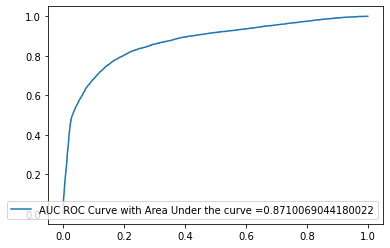

In [32]:
xgboostModel = XGBClassifier(learning_rate =0.1, n_estimators=200, max_depth=4,
                            min_child_weight=10, gamma=5, subsample=0.8, colsample_bytree=1,
                            nthread=-1, scale_pos_weight=1,seed=27,
                            class_weight='balanced',booster='dart')

xgboostModel.fit(df_sampled, y)

y_pred_xgb = xgboostModel.predict_proba(X_test)[:,1]
generate_auc_roc_curve(xgboostModel, X_test,Y_test)

#### CatBoost Classifier

0:	total: 124ms	remaining: 18.5s
1:	total: 177ms	remaining: 13.1s
2:	total: 257ms	remaining: 12.6s
3:	total: 343ms	remaining: 12.5s
4:	total: 421ms	remaining: 12.2s
5:	total: 473ms	remaining: 11.4s
6:	total: 580ms	remaining: 11.8s
7:	total: 645ms	remaining: 11.4s
8:	total: 707ms	remaining: 11.1s
9:	total: 791ms	remaining: 11.1s
10:	total: 874ms	remaining: 11s
11:	total: 944ms	remaining: 10.9s
12:	total: 1.03s	remaining: 10.8s
13:	total: 1.12s	remaining: 10.8s
14:	total: 1.21s	remaining: 10.8s
15:	total: 1.3s	remaining: 10.9s
16:	total: 1.37s	remaining: 10.7s
17:	total: 1.45s	remaining: 10.6s
18:	total: 1.55s	remaining: 10.7s
19:	total: 1.63s	remaining: 10.6s
20:	total: 1.71s	remaining: 10.5s
21:	total: 1.8s	remaining: 10.5s
22:	total: 1.89s	remaining: 10.4s
23:	total: 1.98s	remaining: 10.4s
24:	total: 2.06s	remaining: 10.3s
25:	total: 2.15s	remaining: 10.3s
26:	total: 2.24s	remaining: 10.2s
27:	total: 2.3s	remaining: 10s
28:	total: 2.38s	remaining: 9.93s
29:	total: 2.47s	remaining: 9.8

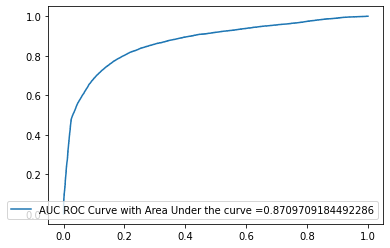

In [33]:
cat = CatBoostClassifier(iterations=150,learning_rate=0.05, depth=10,eval_metric='AUC',l2_leaf_reg = 5)
cat.fit(df_sampled, y, verbose=True)

y_pred_cat = cat.predict_proba(X_test)[:,1]
generate_auc_roc_curve(cat, X_test,Y_test)

### Stacking models

In [34]:
level0 = list()
level0.append(('cat', CatBoostClassifier(iterations=150,learning_rate=0.05, depth=10,eval_metric='AUC',l2_leaf_reg = 5)))
level0.append(('xgb', XGBClassifier(learning_rate =0.1, n_estimators=200, max_depth=4,
                            min_child_weight=10, gamma=5, subsample=0.8, colsample_bytree=1,
                            nthread=-1, scale_pos_weight=1,seed=27,
                            class_weight='balanced',booster='dart')))

level1 = LogisticRegression()

ensembledModel = StackingClassifier(estimators=level0, final_estimator=level1)
ensembledModel.fit(df_sampled, y)

0:	total: 78.7ms	remaining: 11.7s
1:	total: 134ms	remaining: 9.9s
2:	total: 210ms	remaining: 10.3s
3:	total: 296ms	remaining: 10.8s
4:	total: 375ms	remaining: 10.9s
5:	total: 433ms	remaining: 10.4s
6:	total: 517ms	remaining: 10.6s
7:	total: 580ms	remaining: 10.3s
8:	total: 652ms	remaining: 10.2s
9:	total: 744ms	remaining: 10.4s
10:	total: 826ms	remaining: 10.4s
11:	total: 901ms	remaining: 10.4s
12:	total: 989ms	remaining: 10.4s
13:	total: 1.07s	remaining: 10.4s
14:	total: 1.16s	remaining: 10.4s
15:	total: 1.25s	remaining: 10.4s
16:	total: 1.31s	remaining: 10.3s
17:	total: 1.4s	remaining: 10.3s
18:	total: 1.49s	remaining: 10.3s
19:	total: 1.57s	remaining: 10.2s
20:	total: 1.66s	remaining: 10.2s
21:	total: 1.75s	remaining: 10.2s
22:	total: 1.85s	remaining: 10.2s
23:	total: 1.93s	remaining: 10.1s
24:	total: 2.02s	remaining: 10.1s
25:	total: 2.1s	remaining: 10s
26:	total: 2.18s	remaining: 9.95s
27:	total: 2.24s	remaining: 9.78s
28:	total: 2.33s	remaining: 9.72s
29:	total: 2.41s	remaining: 

StackingClassifier(cv=None,
                   estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x7f8609298e10>),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='dart',
                                              class_weight='balanced',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=5,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=4,
                                              min_child_weight=10, missing=None,
                                              n_estimators=200, n_jobs=1...
                                              seed=27, silent=None,
                                              subsample=0.8, verbosity=1))],

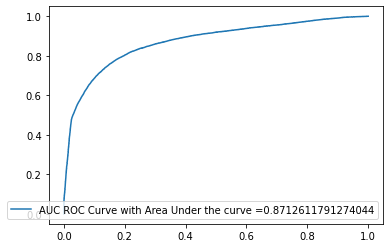

In [35]:
y_pred_ensemble = ensembledModel.predict_proba(X_test)[:,1]
generate_auc_roc_curve(ensembledModel, X_test,Y_test)

# Final Predictions

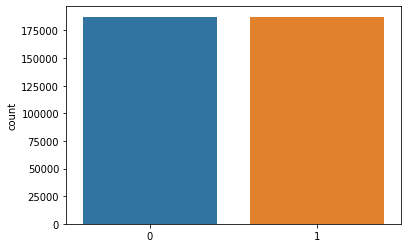

In [36]:
over = RandomOverSampler()
x, y = over.fit_resample(X, Y[target])
df_sampled_final = pd.DataFrame(x, columns = X.columns)
sns.countplot(y)

In [38]:
ensembledModel.fit(df_sampled_final,y)
y_pred = ensembledModel.predict_proba(test_data)[:,1]

0:	total: 90.7ms	remaining: 13.5s
1:	total: 158ms	remaining: 11.7s
2:	total: 254ms	remaining: 12.4s
3:	total: 354ms	remaining: 12.9s
4:	total: 435ms	remaining: 12.6s
5:	total: 548ms	remaining: 13.2s
6:	total: 650ms	remaining: 13.3s
7:	total: 746ms	remaining: 13.2s
8:	total: 819ms	remaining: 12.8s
9:	total: 923ms	remaining: 12.9s
10:	total: 1.03s	remaining: 13s
11:	total: 1.15s	remaining: 13.2s
12:	total: 1.26s	remaining: 13.3s
13:	total: 1.36s	remaining: 13.2s
14:	total: 1.46s	remaining: 13.1s
15:	total: 1.57s	remaining: 13.1s
16:	total: 1.66s	remaining: 13s
17:	total: 1.78s	remaining: 13s
18:	total: 1.88s	remaining: 13s
19:	total: 1.99s	remaining: 13s
20:	total: 2.1s	remaining: 12.9s
21:	total: 2.21s	remaining: 12.8s
22:	total: 2.3s	remaining: 12.7s
23:	total: 2.42s	remaining: 12.7s
24:	total: 2.53s	remaining: 12.6s
25:	total: 2.64s	remaining: 12.6s
26:	total: 2.74s	remaining: 12.5s
27:	total: 2.86s	remaining: 12.5s
28:	total: 2.96s	remaining: 12.4s
29:	total: 3.08s	remaining: 12.3s
3

In [39]:
final_df = pd.DataFrame({"ID": test_data_id_list, target:y_pred})

In [40]:
final_df.to_csv('final_predictions.csv',index=False)